Import libs

In [79]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ข้อมูลถูกโหลดเรียบร้อยแล้ว
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


C:\Users\Lab\AppData\Local\Temp\ipykernel_4476\4123788556.py:50: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(data=self.data, x="Species", y="PetalLengthCm", jitter=True, edgecolor="gray")


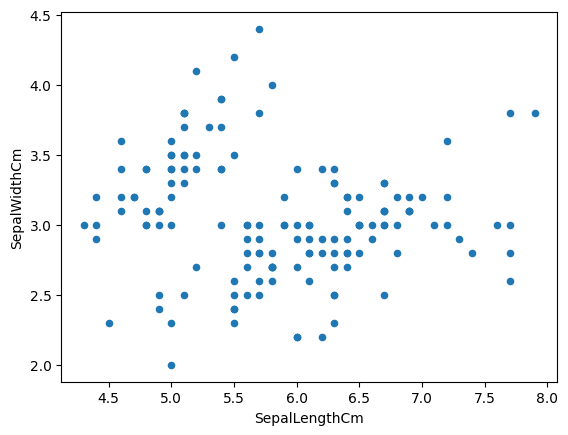

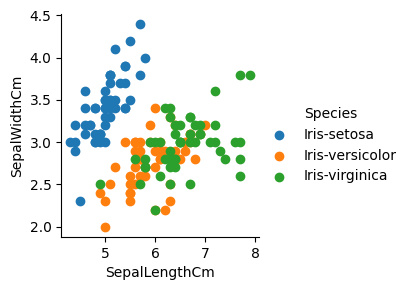

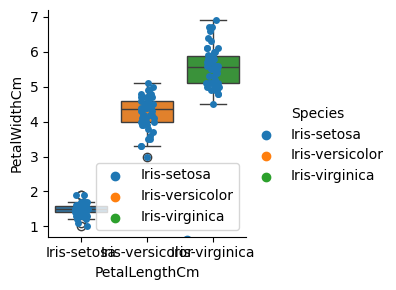

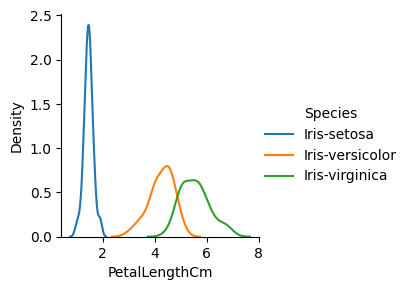

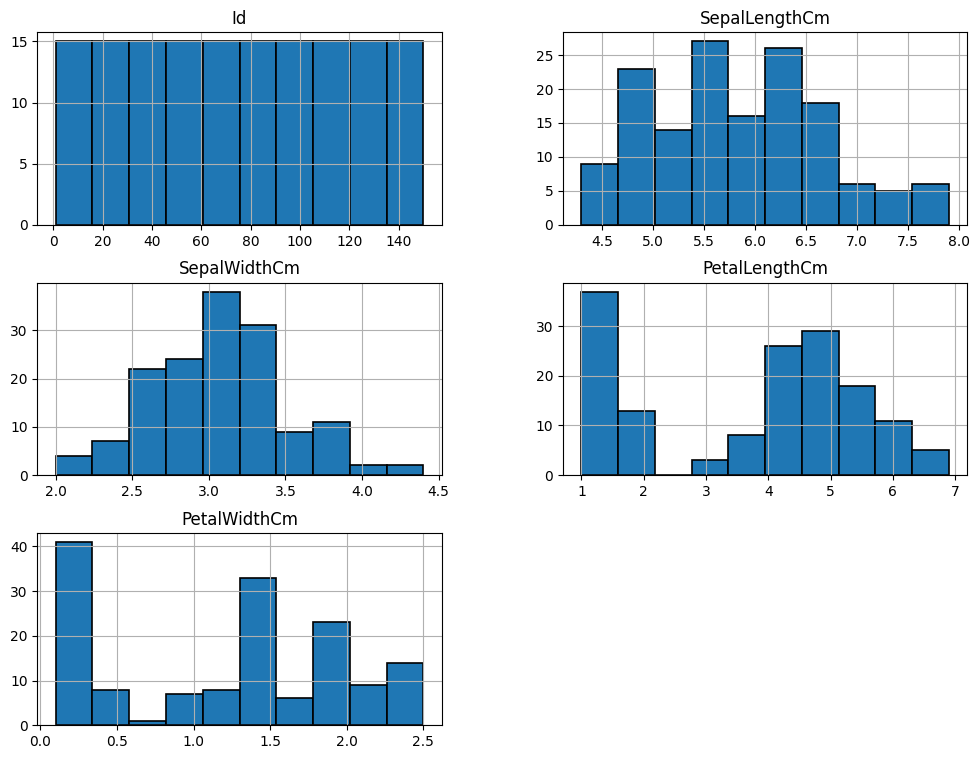

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


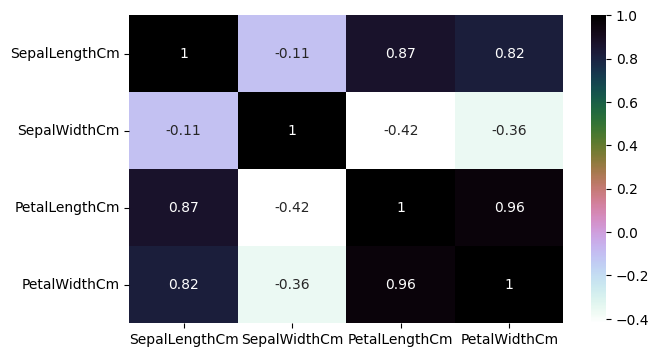

In [80]:
import pandas as pd
from IPython.display import display

class IrisData:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None

    def load_data(self):
        """โหลดข้อมูลจากไฟล์ CSV"""
        try:
            self.data = pd.read_csv(self.file_path)
            print("ข้อมูลถูกโหลดเรียบร้อยแล้ว")
        except FileNotFoundError:
            print(f"ไม่พบไฟล์: {self.file_path}")
        except Exception as e:
            print(f"เกิดข้อผิดพลาดในการโหลดข้อมูล: {e}")

    def show_data(self):
        """แสดงข้อมูลใน DataFrame"""
        if self.data is not None:
            self.data.info()
            display(self.data['Species'].value_counts())
            display(self.data.head())  # แสดงข้อมูล 5 แถวแรกโดยใช้ display
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_summary(self):
        """แสดงสรุปข้อมูล"""
        if self.data is not None:
            display(self.data.describe())  # แสดงสถิติเบื้องต้นของข้อมูล
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_plot(self):
        if self.data is not None:
            self.data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")  # แสดงสถิติเบื้องต้นของข้อมูล
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_grid(self,x ,y):
        if self.data is not None:
            sns.FacetGrid(self.data, hue="Species").map(plt.scatter, x, y).add_legend()
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_boxplot(self):
        if self.data is not None:
            sns.boxplot(data=self.data, x="Species", hue="Species", y="PetalLengthCm")
            ax = sns.stripplot(data=self.data, x="Species", y="PetalLengthCm", jitter=True, edgecolor="gray")
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_facegrid(self):
        if self.data is not None:
            sns.FacetGrid(data=self.data, hue="Species").map(sns.kdeplot, "PetalLengthCm").add_legend()
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_hist(self):
        if self.data is not None:
            self.data.hist(edgecolor='black', linewidth=1.2)# Creates histograms for each column in the DataFrame 'df_iris'
            fig=plt.gcf() # Gets the current figure
            fig.set_size_inches(12,9) # Sets the size of the figure to 12 inches by 6 inches
            plt.show() # Displays the plot
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_drop(self):
        if self.data is not None:
            self.data.drop("Id", axis=1, inplace=True)
            display(self.data.head())
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

    def get_heatmap(self):
        if self.data is not None:
            plt.figure(figsize=(7,4))
            sns.heatmap(self.data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].corr(),annot=True,cmap='cubehelix_r') #draws heatmap with input as the correlation matrix calculted by(iris.corr())
            plt.show()
        else:
            print("ไม่มีข้อมูลที่โหลดเข้ามา")

# การใช้งาน
if __name__ == "__main__":
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    iris_file = "IrisSpecies.csv"
    iris_data = IrisData(iris_file)
    
    iris_data.load_data()  # โหลดข้อมูลจากไฟล์
    iris_data.show_data()  # แสดงข้อมูลเบื้องต้น
    iris_data.get_summary()  # แสดงสรุปข้อมูล
    iris_data.get_plot()
    iris_data.get_grid("SepalLengthCm", "SepalWidthCm")
    iris_data.get_grid("PetalLengthCm", "PetalWidthCm")
    iris_data.get_boxplot()
    iris_data.get_facegrid()
    iris_data.get_hist()
    iris_data.get_drop()
    iris_data.get_heatmap()



In [81]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

file_path = "IrisSpecies.csv"

text_data = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

iris_data = pd.read_csv(file_path)

train, test = train_test_split(iris_data, test_size=0.2, random_state=42)

train = train.sample(frac=1).reset_index(drop=True)
test = test.reset_index(drop=True)

train_x = train[text_data]
train_y = train.Species
test_x = test[text_data]
test_y = test.Species

train_x.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.5,4.2,1.4,0.2
1,6.5,2.8,4.6,1.5


In [82]:
from sklearn.linear_model import LogisticRegression
model_logisregress = LogisticRegression()
model_logisregress.fit(train_x, train_y)
prediction = model_logisregress.predict(test_x)
print(f'result : {metrics.accuracy_score(prediction, test_y)}')

result : 1.0


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics  # Import metrics module for accuracy_score

# Create the Decision Tree model
model_dt = DecisionTreeClassifier()

# Train the model with the training data and training labels
model_dt.fit(train_x, train_y)

# Predict using the test data (features)
prediction = model_dt.predict(test_x)

# Calculate and print the accuracy
print('The accuracy of the Decision Tree is', metrics.accuracy_score(test_y, prediction))


The accuracy of the Decision Tree is 1.0


In [84]:
TP = 0
FP = 0

for i in test_y.index:
    print(f"Target = {test_y[i]} : AI_Predicted {prediction[i]}")
    if test_y[i] != prediction[i]:
        print("error")
        FP += 1
    else:
        TP += 1

print(f"TP = {TP} : FP = {FP}")
print(f"Accuracy = {TP / (TP + FP)}")
print(f'Accuracy = {TP/(TP+FP)*100}%')

Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-setosa : AI_Predicted Iris-setosa
Target = Iris-virginica : AI_Predicted Iris-virginica
Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-setosa : AI_Predicted Iris-setosa
Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-virginica : AI_Predicted Iris-virginica
Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-virginica : AI_Predicted Iris-virginica
Target = Iris-setosa : AI_Predicted Iris-setosa
Target = Iris-setosa : AI_Predicted Iris-setosa
Target = Iris-setosa : AI_Predicted Iris-setosa
Target = Iris-setosa : AI_Predicted Iris-setosa
Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-virginica : AI_Predicted Iris-virginica
Target = Iris-versicolor : AI_Predicted Iris-versicolor
Target = Iris-versicolor : AI_Predicted Iris-ver

In [85]:
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
model_knn = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model_knn.fit(train_x,train_y)
prediction=model_knn.predict(test_x)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 1.0


In [86]:
from sklearn import svm
from sklearn import metrics  # Import metrics module for accuracy_score

# Create the SVM model
model_svm = svm.SVC()

# Train the model with the training data and training labels
model_svm.fit(train_x, train_y)

# Predict using the test data
prediction = model_svm.predict(test_x)

# Calculate and print the accuracy
print('The accuracy of the SVM is ', metrics.accuracy_score(test_y, prediction))


The accuracy of the SVM is  1.0


In [87]:
from sklearn.ensemble import RandomForestClassifier #for Random Forest Algorithm
model_rf=RandomForestClassifier(n_estimators=100)# a simple random forest model
model_rf.fit(train_x,train_y)# now we fit the model
prediction=model_rf.predict(test_x)# predict the test data
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction,test_y))


The accuracy of the Random Forests is 1.0


In [88]:
## Importing required libraries
from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import LabelEncoder # don't use now
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
onehot_encoder = OneHotEncoder()
# normalize minmax ---> (X-min_x)/(max_x - min_x)
scaler_train = MinMaxScaler()
scaler_test = MinMaxScaler()
Label_train_y = onehot_encoder.fit_transform(train_y.to_numpy().reshape(-1,1)).toarray()
Data_train_x = scaler_train.fit_transform(train_x.astype(np.float64))

Label_test_y = onehot_encoder.fit_transform(test_y.to_numpy().reshape(-1,1)).toarray()
Data_test_X = scaler_test.fit_transform(test_x.astype(np.float64))

print(f"min={scaler_train.data_min_},max={scaler_train.data_max_}")
# print the first row of the normal data
print(f"train_x (before normalize): \n{train_x.iloc[0,:]}")
print(f"\nNormallizedData:{Data_train_x[0,:]}")

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, alpha=1e-4, early_stopping=False,
  solver='sgd', verbose=10, random_state=1,
  learning_rate_init=.1)
mlp.fit(Data_train_x, Label_train_y)

prediction=mlp.predict(Data_test_X)# predict the test data
print('The accuracy of the ANN is',metrics.accuracy_score(prediction,Label_test_y))

min=[4.3 2.  1.  0.1],max=[7.7 4.4 6.7 2.5]
train_x (before normalize): 
SepalLengthCm    5.5
SepalWidthCm     4.2
PetalLengthCm    1.4
PetalWidthCm     0.2
Name: 0, dtype: float64

NormallizedData:[0.35294118 0.91666667 0.07017544 0.04166667]
Iteration 1, loss = 2.27343702
Iteration 2, loss = 2.07715765
Iteration 3, loss = 1.89673414
Iteration 4, loss = 1.76897904
Iteration 5, loss = 1.69720051
Iteration 6, loss = 1.66048916
Iteration 7, loss = 1.63318948
Iteration 8, loss = 1.59542919
Iteration 9, loss = 1.53933407
Iteration 10, loss = 1.46717964
Iteration 11, loss = 1.38695377
Iteration 12, loss = 1.30731020
Iteration 13, loss = 1.23470972
Iteration 14, loss = 1.17190911
Iteration 15, loss = 1.11867872
Iteration 16, loss = 1.07364271
Iteration 17, loss = 1.03530820
Iteration 18, loss = 1.00216022
Iteration 19, loss = 0.97283003
Iteration 20, loss = 0.94663753
Iteration 21, loss = 0.92248727
Iteration 22, loss = 0.90000328
Iteration 23, loss = 0.87916263
Iteration 24, loss = 0.860008

In [89]:
# Let's try to predict the species of an iris flower with the following measurements:
# Sepal Length = 5.1 cm
# Sepal Width = 3.5 cm
# Petal Length = 1.4 cm
# Petal Width = 0.2 cm
# The actual species of this flower is setosa
# Let's see if the model can predict this correctly
one_flower = np.array([5.1, 3.5, 1.4, 0.2]).reshape(1, -1)
# predict using logistic regression model
logisregress_prediction = model_logisregress.predict(one_flower)
print(f'The model predicts that this flower of model_logisregress is a {prediction[0]}')
# predict using decision tree model
dt_prediction = model_dt.predict(one_flower)
print(f'The model predicts that this flower of model_dt is a {prediction[0]}')
# predict using KNN model
knn_prediction = model_knn.predict(one_flower)
print(f'The model predicts that this flower of model_knn is a {prediction[0]}')
# predict using SVM model
svm_prediction = model_svm.predict(one_flower)
print(f'The model predicts that this flower of model_svm is a {prediction[0]}')
# predict using Random Forest model
rf_prediction = model_rf.predict(one_flower)
print(f'The model predicts that this flower of model_rf is a {prediction[0]}')
# predict using ANN model
ann_prediction = mlp.predict(one_flower)
print(f'The model predicts that this flower of mlp is a {prediction[0]}')


The model predicts that this flower of model_logisregress is a [0 1 0]
The model predicts that this flower of model_dt is a [0 1 0]
The model predicts that this flower of model_knn is a [0 1 0]
The model predicts that this flower of model_svm is a [0 1 0]
The model predicts that this flower of model_rf is a [0 1 0]
The model predicts that this flower of mlp is a [0 1 0]


d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [90]:
# Let's try to predict the species of an iris flower with the following measurements:
# Sepal Length = 5.1 cm
# Sepal Width = 3.5 cm
# Petal Length = 1.4 cm
# Petal Width = 0.2 cm
# The actual species of this flower is setosa
# Let's see if the model can predict this correctly
one_flower = np.array([5.1, 3.5, 1.4, 0.2]).reshape(1, -1)
# predict using logistic regression model
logisregress_prediction = model_logisregress.predict(one_flower)
print(f'The model predicts that this flower of model_logisregress is a {prediction[0]}')
# predict using decision tree model
dt_prediction = model_dt.predict(one_flower)
print(f'The model predicts that this flower of model_dt is a {prediction[0]}')
# predict using KNN model
knn_prediction = model_knn.predict(one_flower)
print(f'The model predicts that this flower of model_knn is a {prediction[0]}')
# predict using SVM model
svm_prediction = model_svm.predict(one_flower)
print(f'The model predicts that this flower of model_svm is a {prediction[0]}')
# predict using Random Forest model
rf_prediction = model_rf.predict(one_flower)
print(f'The model predicts that this flower of model_rf is a {prediction[0]}')
# predict using ANN model
ann_prediction = mlp.predict(one_flower)
print(f'The model predicts that this flower of mlp is a {prediction[0]}')


The model predicts that this flower of model_logisregress is a [0 1 0]
The model predicts that this flower of model_dt is a [0 1 0]
The model predicts that this flower of model_knn is a [0 1 0]
The model predicts that this flower of model_svm is a [0 1 0]
The model predicts that this flower of model_rf is a [0 1 0]
The model predicts that this flower of mlp is a [0 1 0]


d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\python test\AI\test_env2\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\Lab\AppData\Local\Temp\ipykernel_4476\1381560802.py:8: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  a=pd.concat([a,pd.Series(metrics.accuracy_score(prediction,test_y))])


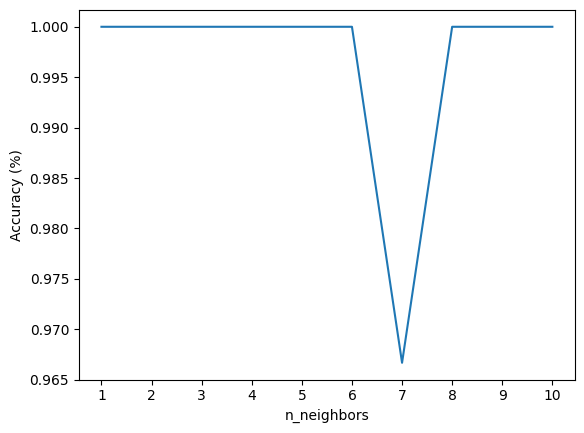

In [91]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    a=pd.concat([a,pd.Series(metrics.accuracy_score(prediction,test_y))])
plt.plot(a_index, a)
plt.xticks(x)
# Add axis labels
plt.xlabel("n_neighbors")  # X-axis title
plt.ylabel("Accuracy (%)")  # Y-axis title
# Show the plot
plt.show()
